In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [48]:
df = pd.read_csv('Resources/final_totals.csv')
df.head(10)

,team,season,team_payroll,avg_payroll,diff,w,l,ws_win,playoffs,warp,...,pitched_home_runs,pitched_base_on_balls,pitched_hits,pitcher_average,pitched_strike_outs,saves,holds,earned_runs,whip,walks_per_9_inn
0,Red Sox,2007,147568833,85747487,61821346,96,66,1,1,50.42,...,155,433,1336,2.8540,1079,44,73,601,14.930,51.19
1,Yankees,2009,203275189,92957049,110318140,103,59,1,1,26.40,...,44,140,391,1.5930,358,44,15,181,9.240,44.82
2,Red Sox,2013,150655000,106658387,43996613,97,65,1,1,39.34,...,26,66,199,1.1010,266,29,63,70,5.650,14.49
3,Blue Jays,2001,76322999,67120750,9202249,80,82,0,0,15.39,...,141,350,1193,2.1740,754,1,0,552,11.585,42.16
4,Cubs,2016,171611832,130290910,41320922,103,59,1,1,50.80,...,88,282,745,1.8965,788,2,36,285,10.355,34.97
5,Red Sox,2018,233200428,135681867,97518561,108,54,1,1,32.09,...,77,254,532,2.3430,665,44,62,259,12.970,36.14
6,Brewers,2000,35770333,57491092,-21720759,73,89,0,0,18.02,...,122,525,1106,2.6580,744,43,0,533,15.035,57.95
7,Blue Jays,2002,76464333,69204705,7259628,78,84,0,0,18.41,...,85,329,939,2.2010,630,39,0,429,12.105,49.79
8,Indians,2005,40873600,73628169,-32754569,93,69,0,0,57.87,...,151,387,1298,2.8960,992,50,69,562,14.560,32.50
9,White Sox,2006,102175667,81192832,20982835,90,72,0,0,27.12,...,185,372,1422,2.7500,919,44,47,685,14.280,30.40


In [49]:
df.iloc[:,1:].describe()

,season,team_payroll,avg_payroll,diff,w,l,ws_win,playoffs,warp,errors,...,pitched_home_runs,pitched_base_on_balls,pitched_hits,pitcher_average,pitched_strike_outs,saves,holds,earned_runs,whip,walks_per_9_inn
count,579.000000,5.790000e+02,5.790000e+02,5.790000e+02,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,...,579.000000,579.000000,579.000000,578.000000,579.000000,579.000000,579.000000,579.000000,578.000000,579.000000
mean,2009.696028,9.789295e+07,9.790098e+07,-8.029775e+03,81.012090,80.987910,0.031088,0.298791,23.728031,51.721934,...,84.086356,247.597582,707.297064,1.996433,577.100173,25.996546,31.512953,329.138169,10.996488,39.929430
std,5.748552,4.460790e+07,2.481593e+07,3.706725e+07,11.889843,11.889843,0.173706,0.458124,12.880638,27.168519,...,37.907639,106.201930,311.822844,0.606052,238.920576,19.127056,25.929458,143.842949,3.665227,27.431031
min,2000.000000,1.654250e+07,5.749109e+07,-8.055279e+07,43.000000,46.000000,0.000000,0.000000,-1.790000,0.000000,...,0.000000,0.000000,0.000000,0.452000,0.000000,0.000000,0.000000,0.000000,2.400000,0.000000
25%,2005.000000,6.606192e+07,7.362817e+07,-2.494694e+07,72.000000,72.000000,0.000000,0.000000,13.940000,29.000000,...,56.000000,170.000000,477.000000,1.572125,406.000000,7.000000,4.000000,218.500000,8.501250,24.590000
50%,2010.000000,9.006266e+07,9.495796e+07,-5.223997e+06,82.000000,80.000000,0.000000,0.000000,21.820000,52.000000,...,79.000000,237.000000,672.000000,1.965500,556.000000,28.000000,33.000000,316.000000,10.790000,34.000000
75%,2015.000000,1.203041e+08,1.254585e+08,2.095791e+07,90.000000,90.000000,0.000000,1.000000,32.105000,73.000000,...,109.000000,314.500000,924.500000,2.381750,734.000000,41.000000,50.000000,428.500000,13.021250,46.070000
max,2019.000000,2.821753e+08,1.365730e+08,1.567168e+08,116.000000,119.000000,1.000000,1.000000,60.290000,126.000000,...,247.000000,658.000000,2017.000000,3.802500,1943.000000,103.000000,114.000000,850.000000,30.985000,288.690000


C:\Users\William\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


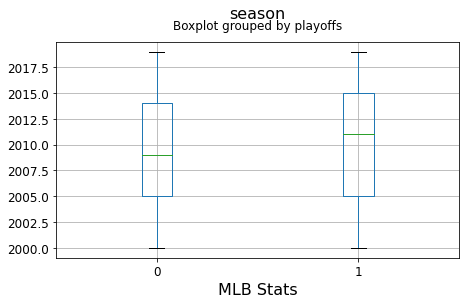

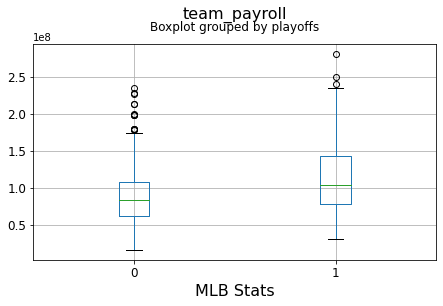

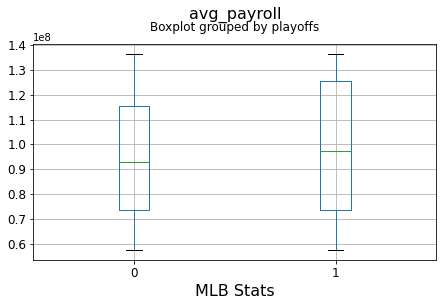

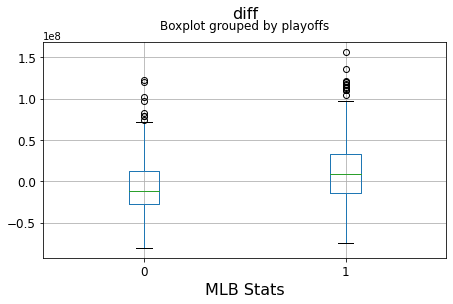

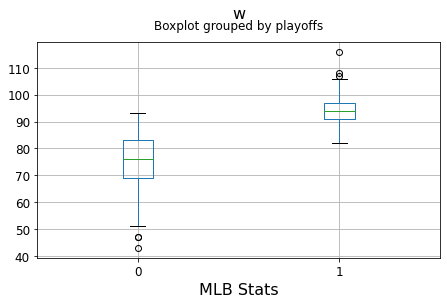

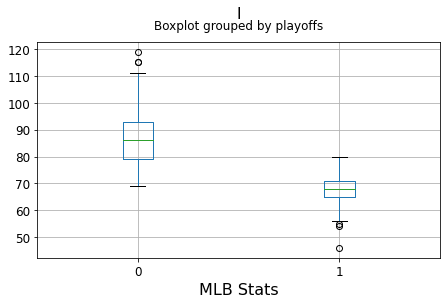

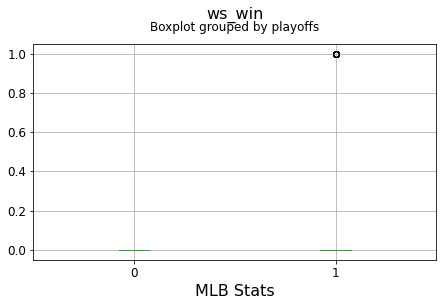

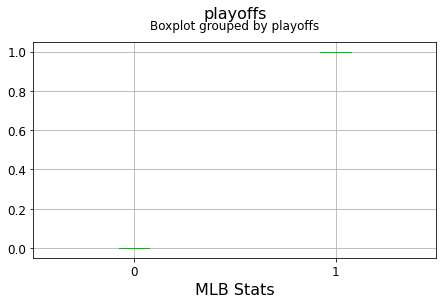

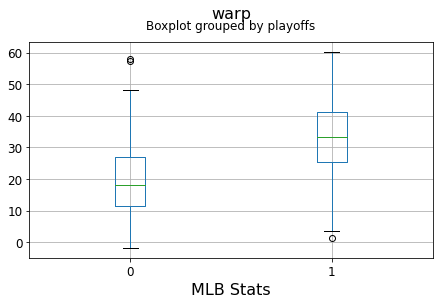

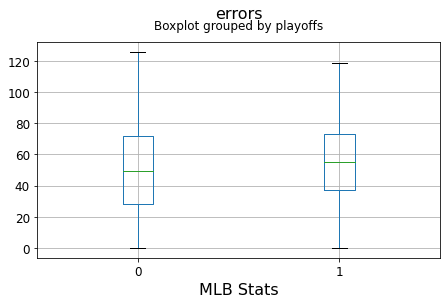

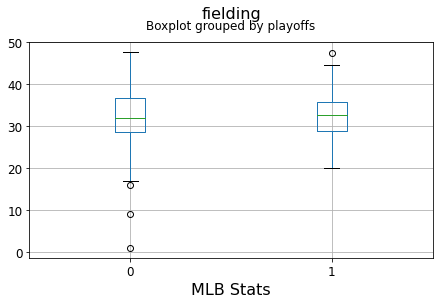

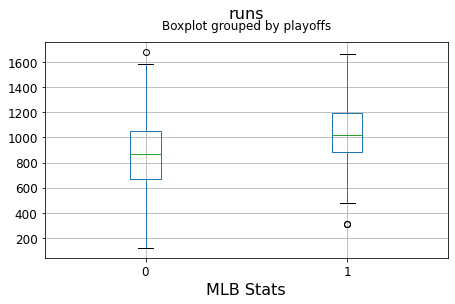

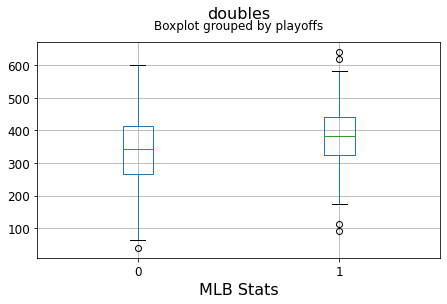

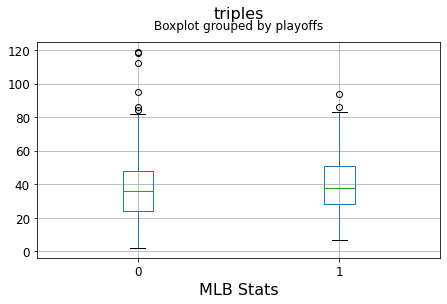

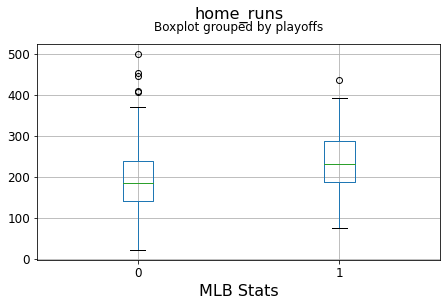

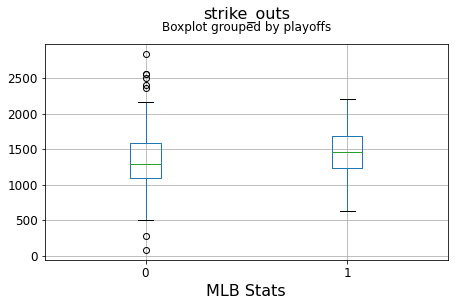

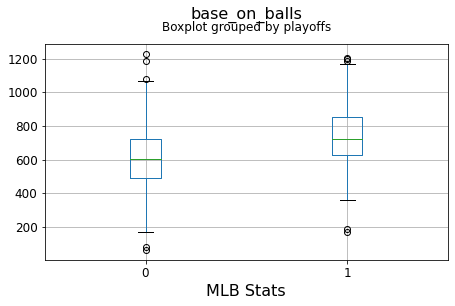

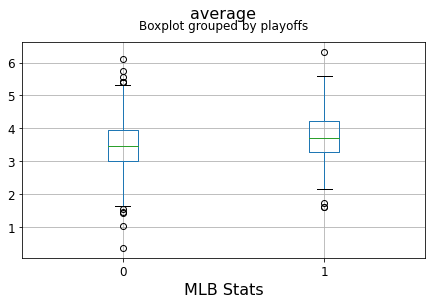

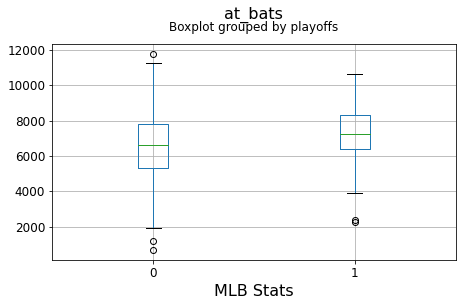

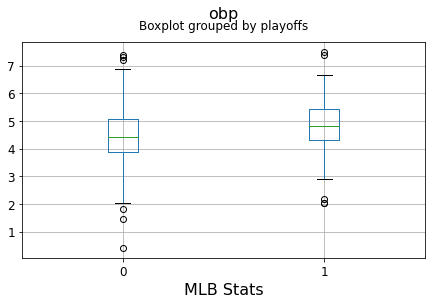

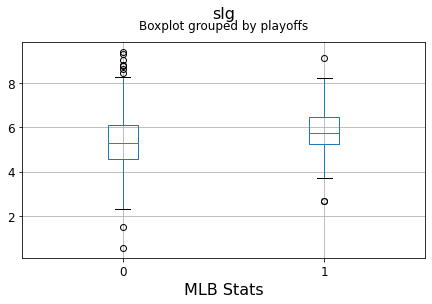

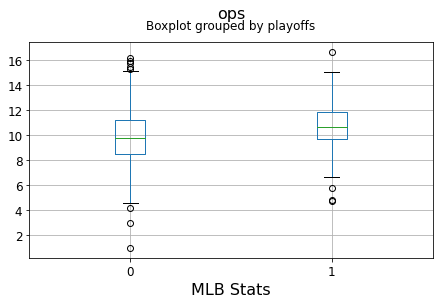

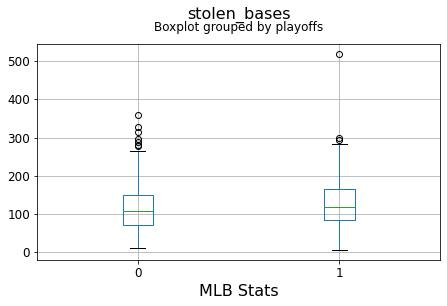

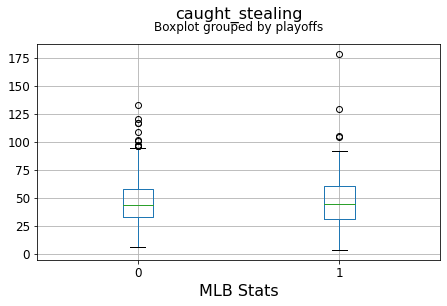

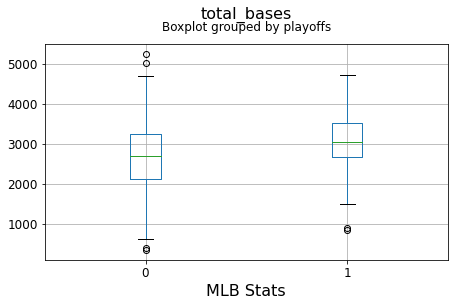

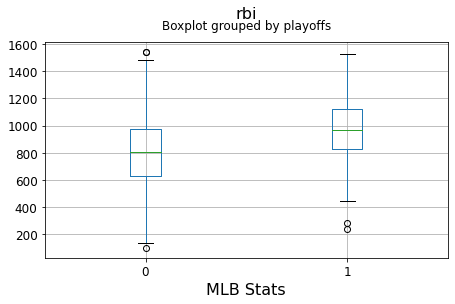

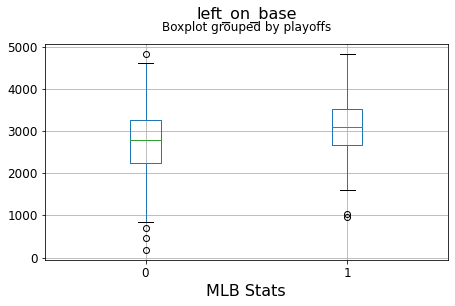

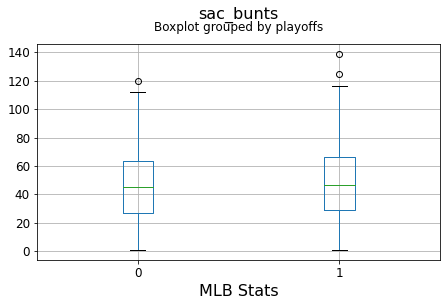

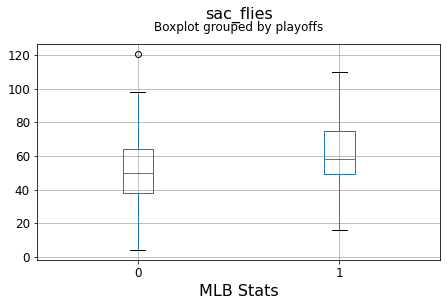

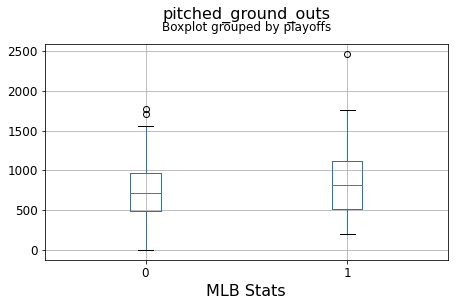

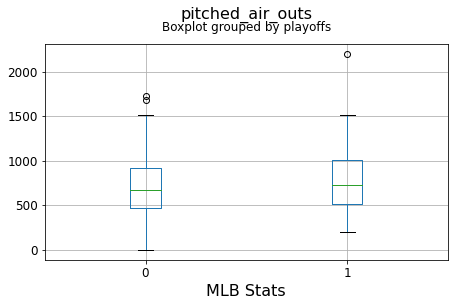

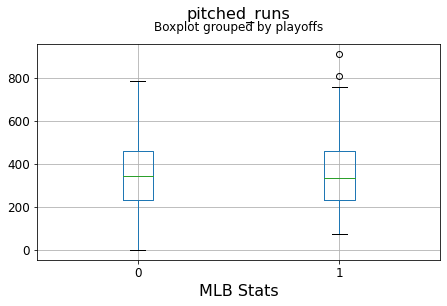

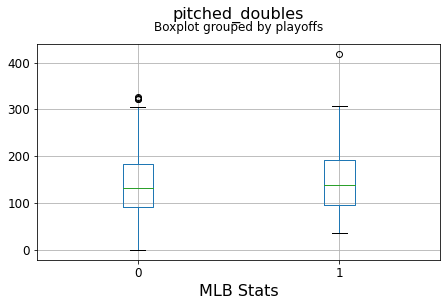

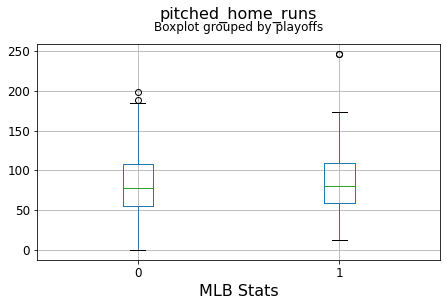

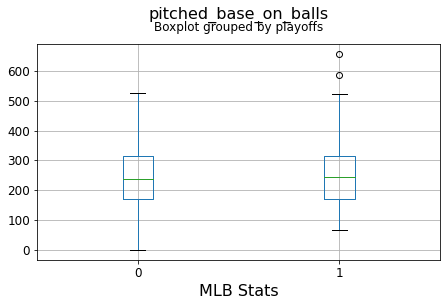

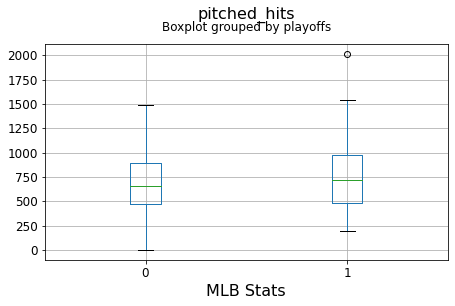

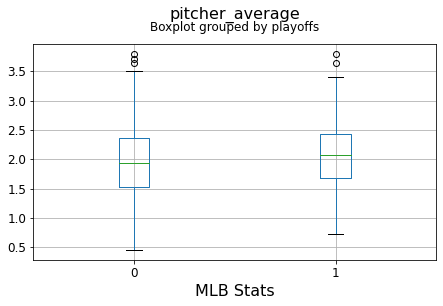

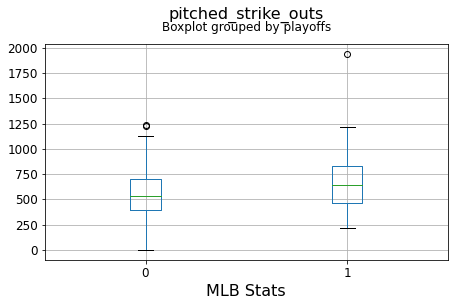

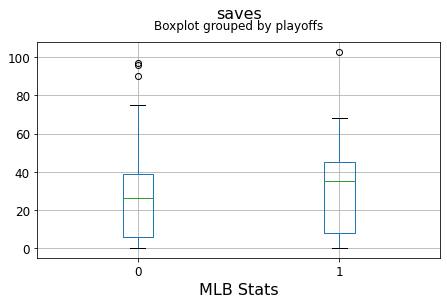

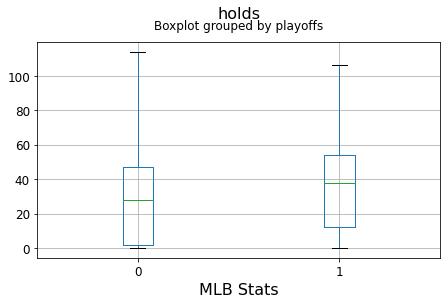

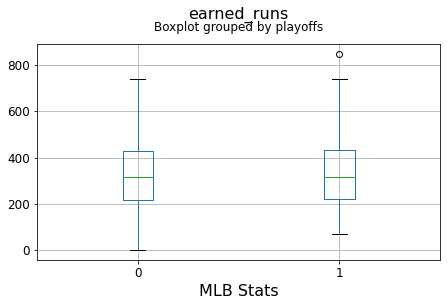

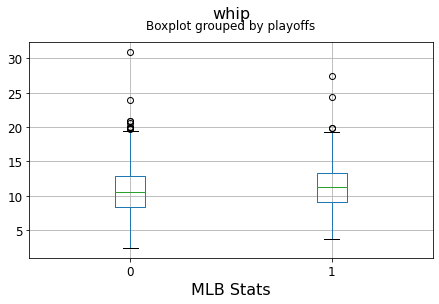

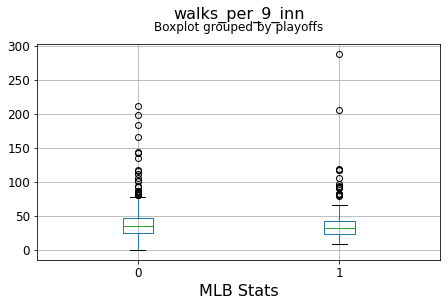

In [50]:
for c in df.columns[1:]:
    df.boxplot(c,by='playoffs',figsize=(7,4),fontsize=12)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("MLB Stats", fontsize=16)

<ipython-input-63-ea4be0cb5c34>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,fontsize=9)
<ipython-input-63-ea4be0cb5c34>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels,fontsize=9)


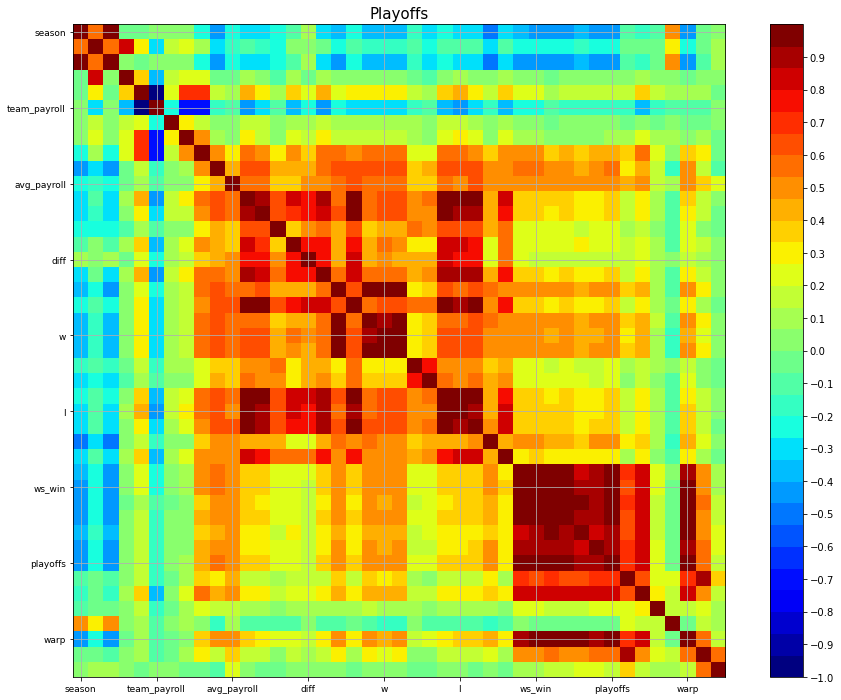

In [63]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Playoffs',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-10,10)])
    plt.show()

correlation_matrix(df)

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

In [54]:
X = df.drop('playoffs',axis=1)
X = df.drop('team', 1)
y = df['playoffs']

In [55]:
X = scaler.fit_transform(X)

In [56]:
dfx = pd.DataFrame(data=X,columns=df.columns[1:])

In [57]:
dfx.head(10)

,season,team_payroll,avg_payroll,diff,w,l,ws_win,playoffs,warp,errors,...,pitched_home_runs,pitched_base_on_balls,pitched_hits,pitcher_average,pitched_strike_outs,saves,holds,earned_runs,whip,walks_per_9_inn
0,-0.469398,1.114575,-0.490169,1.669475,1.261654,-1.261654,5.582711,1.531934,2.074047,1.041739,...,1.872313,1.747263,2.017962,1.416233,2.102514,0.942070,1.601380,1.891625,1.074127,0.410860
1,-0.121183,2.364455,-0.199397,2.978952,1.850901,-1.850901,5.582711,1.531934,0.207620,-0.063435,...,-1.058389,-1.014018,-1.015226,-0.666250,-0.917835,0.942070,-0.637392,-1.030751,-0.479645,0.178440
2,0.575246,1.183819,0.353200,1.188183,1.345832,-1.345832,5.582711,1.531934,1.213097,-0.431826,...,-1.533638,-1.711406,-1.631492,-1.478766,-1.303233,0.157162,1.215385,-1.803093,-1.459969,-0.928198
3,-1.514042,-0.483964,-1.241414,0.248690,-0.085196,0.085196,-0.179124,-0.652770,-0.647890,1.152257,...,1.502675,0.965057,1.558971,0.293244,0.741053,-1.307998,-1.216385,1.550681,0.160705,0.081386
4,1.097567,1.654026,1.306336,1.115936,1.850901,-1.850901,5.582711,1.531934,2.103574,-0.505504,...,0.103331,0.324214,0.121016,-0.165034,0.883483,-1.255671,0.173198,-0.307115,-0.175171,-0.180953
5,1.445782,3.035885,1.523762,2.633346,2.271792,-2.271792,5.582711,1.531934,0.649750,-0.837056,...,-0.187099,0.060337,-0.562655,0.572340,0.368222,0.942070,1.176785,-0.488024,0.538908,-0.138263
6,-1.688149,-1.393841,-1.629793,-0.586272,-0.674443,0.674443,-0.179124,-0.652770,-0.443531,0.673348,...,1.001023,2.614287,1.279726,1.092548,0.699162,0.889743,-1.216385,1.418478,1.102799,0.657509
7,-1.339934,-0.480793,-1.157365,0.196236,-0.253552,0.253552,-0.179124,-0.652770,-0.413227,0.341796,...,0.024123,0.767150,0.743702,0.337834,0.221603,0.680434,-1.216385,0.694842,0.302702,0.359779
8,-0.817613,-1.279340,-0.978960,-0.884200,1.009120,-1.009120,-0.179124,-0.652770,2.652935,2.073235,...,1.766702,1.313752,1.895992,1.485594,1.738061,1.256033,1.446982,1.620261,0.973091,-0.271075
9,-0.643505,0.096091,-0.673866,0.566781,0.756585,-0.756585,-0.179124,-0.652770,0.263566,1.410131,...,2.664394,1.172389,2.293998,1.244482,1.432256,0.942070,0.597793,2.476100,0.896631,-0.347696


In [58]:
dfx.describe()

,season,team_payroll,avg_payroll,diff,w,l,ws_win,playoffs,warp,errors,...,pitched_home_runs,pitched_base_on_balls,pitched_hits,pitcher_average,pitched_strike_outs,saves,holds,earned_runs,whip,walks_per_9_inn
count,5.790000e+02,5.790000e+02,5.790000e+02,5.790000e+02,5.790000e+02,5.790000e+02,5.790000e+02,5.790000e+02,5.790000e+02,5.790000e+02,...,5.790000e+02,5.790000e+02,5.790000e+02,5.780000e+02,5.790000e+02,5.790000e+02,5.790000e+02,5.790000e+02,5.780000e+02,5.790000e+02
mean,1.669783e-14,1.415103e-16,2.569428e-17,-2.147582e-17,-6.634493e-17,6.634493e-17,1.825924e-15,-7.083185e-16,3.566520e-17,1.553162e-17,...,-5.728482e-17,9.875041e-18,1.935220e-16,7.629422e-16,1.081461e-16,-5.340192e-17,2.185931e-17,8.508834e-17,2.135931e-16,8.693391e-17
std,1.000865e+00,1.000865e+00,1.000865e+00,1.000865e+00,1.000865e+00,1.000865e+00,1.000865e+00,1.000865e+00,1.000865e+00,1.000865e+00,...,1.000865e+00,1.000865e+00,1.000865e+00,1.000866e+00,1.000865e+00,1.000865e+00,1.000865e+00,1.000865e+00,1.000866e+00,1.000865e+00
min,-1.688149e+00,-1.825255e+00,-1.629793e+00,-2.174815e+00,-3.199786e+00,-2.945217e+00,-1.791244e-01,-6.527698e-01,-1.982828e+00,-1.905391e+00,...,-2.220108e+00,-2.333401e+00,-2.270227e+00,-2.550559e+00,-2.417536e+00,-1.360326e+00,-1.216385e+00,-2.290156e+00,-2.347449e+00,-1.456889e+00
25%,-8.176125e-01,-7.141910e-01,-9.789602e-01,-6.733833e-01,-7.586208e-01,-7.565854e-01,-1.791244e-01,-6.527698e-01,-7.605597e-01,-8.370564e-01,...,-7.415561e-01,-7.312925e-01,-7.391896e-01,-7.007245e-01,-7.167575e-01,-9.940354e-01,-1.061987e+00,-7.698246e-01,-6.813762e-01,-5.596834e-01
50%,5.292380e-02,-1.756879e-01,-1.186969e-01,-1.408380e-01,8.316043e-02,-8.316043e-02,-1.791244e-01,-6.527698e-01,-1.482598e-01,1.024370e-02,...,-1.342936e-01,-9.987338e-02,-1.132938e-01,-5.108378e-02,-8.839095e-02,1.048351e-01,5.739929e-02,-9.141588e-02,-5.638571e-02,-2.163447e-01
75%,9.234601e-01,5.028377e-01,1.111437e+00,5.661079e-01,7.565854e-01,7.586208e-01,-1.791244e-01,1.531934e+00,6.509159e-01,7.838655e-01,...,6.577879e-01,6.304995e-01,6.971611e-01,6.363339e-01,6.572707e-01,7.850883e-01,7.135912e-01,6.913634e-01,5.529033e-01,2.240484e-01
max,1.619889e+00,4.134731e+00,1.559702e+00,4.231777e+00,2.945217e+00,3.199786e+00,5.582711e+00,1.531934e+00,2.840976e+00,2.736340e+00,...,4.301363e+00,3.867701e+00,4.203782e+00,2.982637e+00,5.721905e+00,4.029373e+00,3.183961e+00,3.624176e+00,5.458277e+00,9.076424e+00


In [62]:
import numpy as np
from sklearn.decomposition import PCA

np.random.seed(0)
my_matrix = np.random.randn(20, 5)

my_model = PCA(n_components=5)
my_model.fit_transform(my_matrix)

print (my_model.explained_variance_)
print (my_model.explained_variance_ratio_)
print (my_model.explained_variance_ratio_.cumsum())

[1.58691121 1.36183634 1.02149516 0.64960702 0.33188507]
[0.32047581 0.27502207 0.20629036 0.13118776 0.067024  ]
[0.32047581 0.59549787 0.80178824 0.932976   1.        ]
